
# <div style="padding:18px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">Cataract Detection CNN|VGG|MobileNet|DenseNet</div>

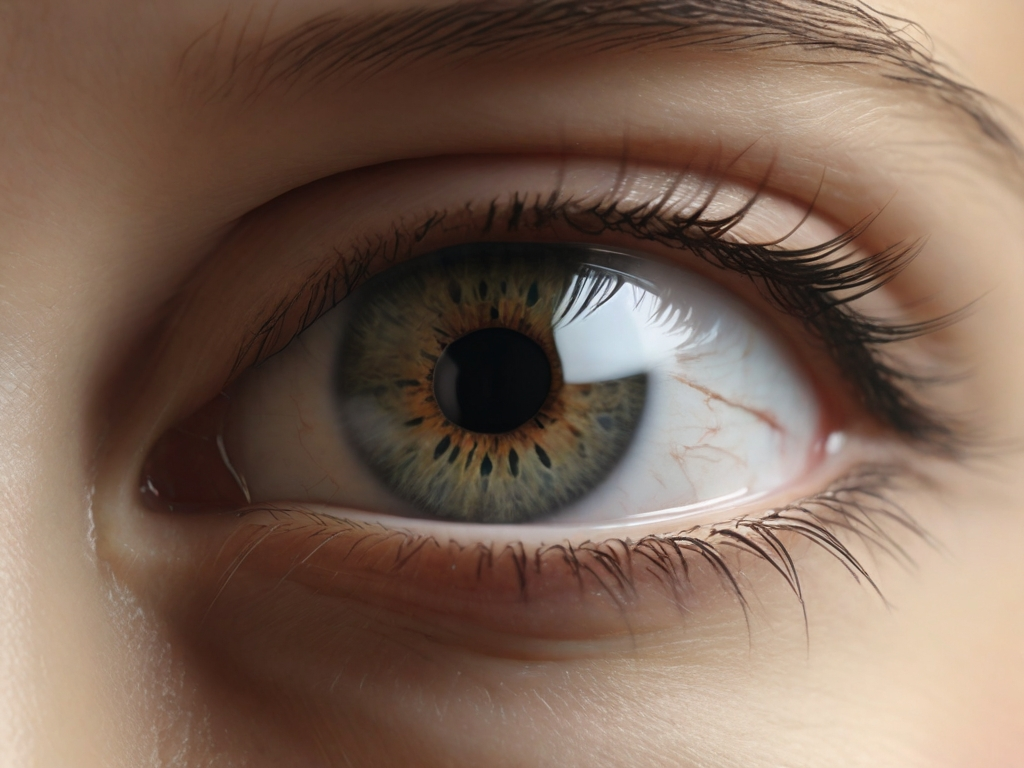


# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">1 | Importing libraries | Image loading</div>

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



2024-02-25 04:04:40.529270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 04:04:40.529397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 04:04:40.691380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_281.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_256.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_301.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_253.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_265.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_286.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_248.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_287.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_264.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_288.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_282.png
/kaggle/input/cataract-image-dataset/processed_images/test/normal/image_278.png
/kaggle/input/cataract-image-dataset/pro

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cataract-image-dataset/processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">2 | CNN</div>

In [3]:
input_shape = (224, 224, 3)  

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

Epoch 1/10


I0000 00:00:1708833901.289862      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - 32s 2s/step - loss: 0.8784 - accuracy: 0.5947 - val_loss: 0.4339 - val_accuracy: 0.8512
Epoch 2/10
16/16 [==============================] - 17s 1s/step - loss: 0.4261 - accuracy: 0.8269 - val_loss: 0.4336 - val_accuracy: 0.7686
Epoch 3/10
16/16 [==============================] - 17s 1s/step - loss: 0.3232 - accuracy: 0.8676 - val_loss: 0.2991 - val_accuracy: 0.9174
Epoch 4/10
16/16 [==============================] - 17s 1s/step - loss: 0.3059 - accuracy: 0.8880 - val_loss: 0.3291 - val_accuracy: 0.9421
Epoch 5/10
16/16 [==============================] - 17s 1s/step - loss: 0.2618 - accuracy: 0.8941 - val_loss: 0.3838 - val_accuracy: 0.9008
Epoch 6/10
16/16 [==============================] - 17s 1s/step - loss: 0.2005 - accuracy: 0.9165 - val_loss: 0.4040 - val_accuracy: 0.8760
Epoch 7/10
16/16 [==============================] - 17s 1s/step - loss: 0.1416 - accuracy: 0.9511 - val_loss: 0.3614 - val_accuracy: 0.9669
Epoch 8/10
16/16 [=============

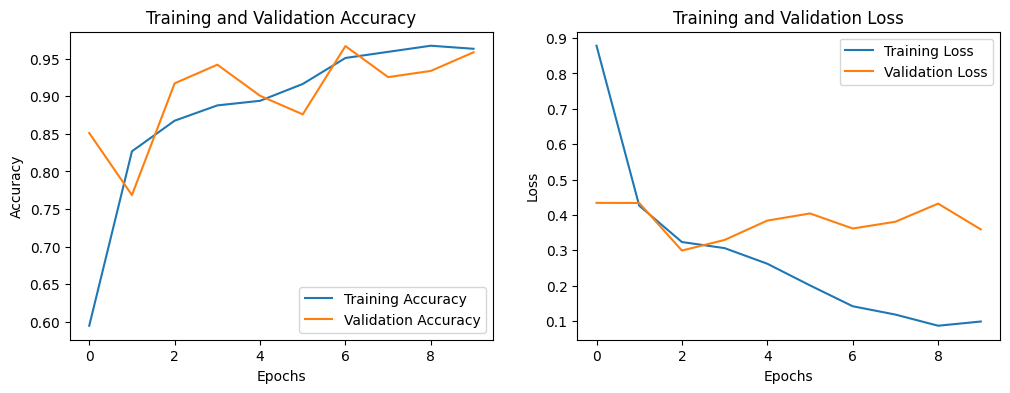

4/4 [==============================] - 4s 616ms/step - loss: 0.3589 - accuracy: 0.9587
Test Accuracy: 95.87%


In [4]:

history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">3 | VGG 16</div>

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
________

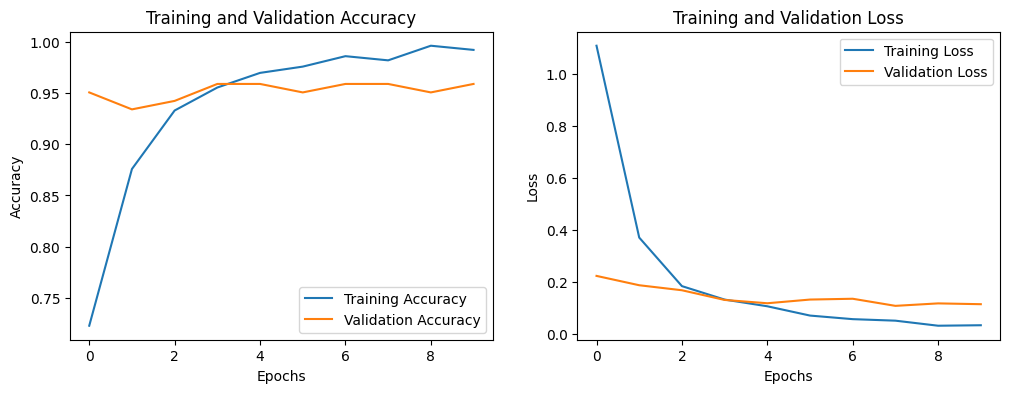

4/4 [==============================] - 4s 1s/step - loss: 0.1135 - accuracy: 0.9587
Test Accuracy: 95.87%


In [5]:
input_shape = (224, 224, 3)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">4 | ResNet50</div>

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23850113 (90.98 MB)
Trainable params: 262

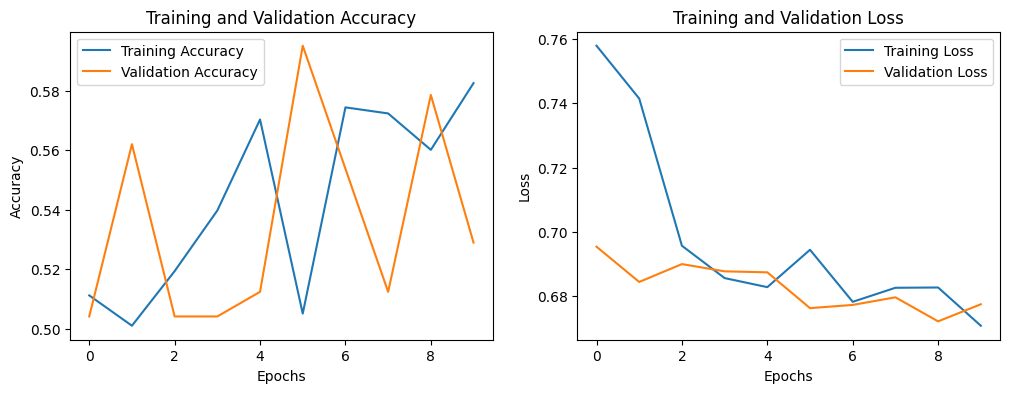

4/4 [==============================] - 4s 809ms/step - loss: 0.6775 - accuracy: 0.5289
Test Accuracy: 52.89%


In [6]:
input_shape = (224, 224, 3)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)



plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">5 | InceptionV3</div>

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22065185 (84.17 MB)
Trainable params: 262

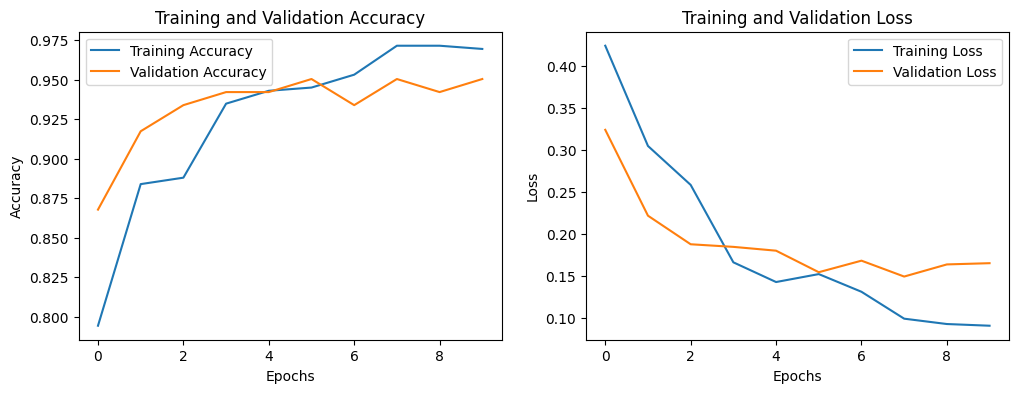

4/4 [==============================] - 4s 1s/step - loss: 0.1650 - accuracy: 0.9504
Test Accuracy: 95.04%


In [7]:

input_shape = (299, 299, 3)  

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">6 | MobileNetV2</div>

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                         

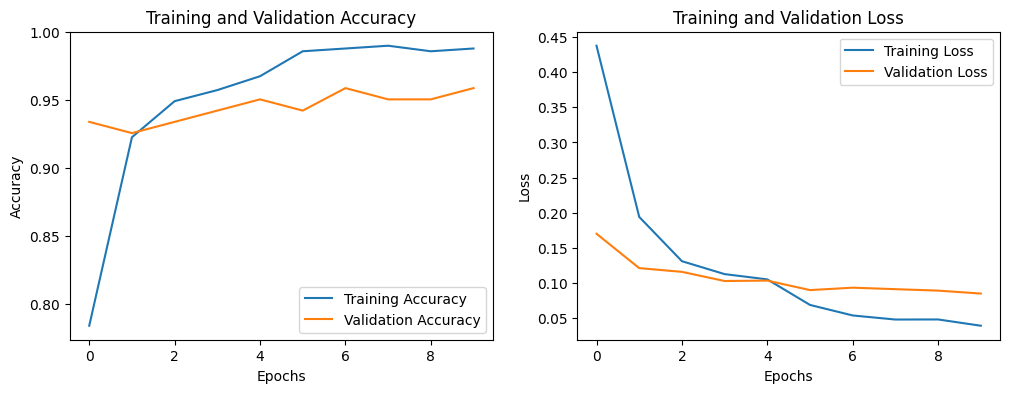

4/4 [==============================] - 4s 721ms/step - loss: 0.0848 - accuracy: 0.9587
Test Accuracy: 95.87%


In [8]:


input_shape = (224, 224, 3)  


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">7 | DenseNet121</div>

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 128)               131200    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 7168833 (27.35 MB)
Trainable params: 1313

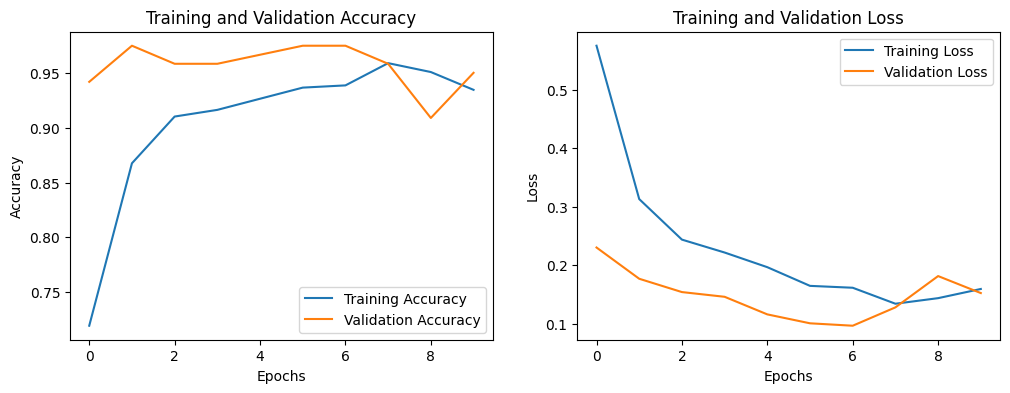

4/4 [==============================] - 4s 726ms/step - loss: 0.1521 - accuracy: 0.9504
Test Accuracy: 95.04%


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


input_shape = (224, 224, 3)  


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



# <div style="padding:18px;color:white;margin:0;font-size:25px;text-align:left;display:fill;border-radius:20px;background-color:#bc8c7c;overflow:hidden">8 | Image thresholding</div>

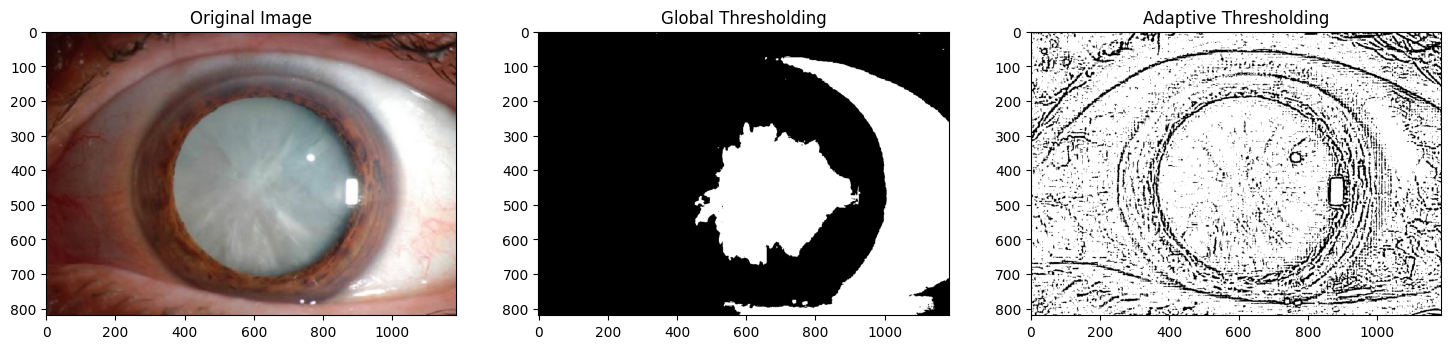

In [10]:
import cv2
import matplotlib.pyplot as plt

image_path = '/kaggle/input/cataract-image-dataset/processed_images/train/cataract/image_104.png'
image = cv2.imread(image_path)

thresh_ada = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

_, thresh = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(thresh_ada, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()
